# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [75]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [76]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#checks for duplicate within the two columns, and adds a boolean that ensures duplicated rows don't get added.
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids


array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
#grabs the data in the bigger dataframe that includes the duplicates
all_duplicate_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ids)]

all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID"])

# Verifying the clean DataFrame
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [26]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique

<bound method IndexOpsMixin.nunique of 0       k403
10      s185
20      x401
30      m601
40      g791
        ... 
1858    z314
1860    z435
1863    z581
1873    z795
1883    z969
Name: Mouse ID, Length: 249, dtype: object>

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#generating all the values at once within the dataframe
summary_statistics_agg = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#renaming the values to fit the chart and for better clarity
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
    })
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
#same solution without renaming
summary_statistics_agg = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

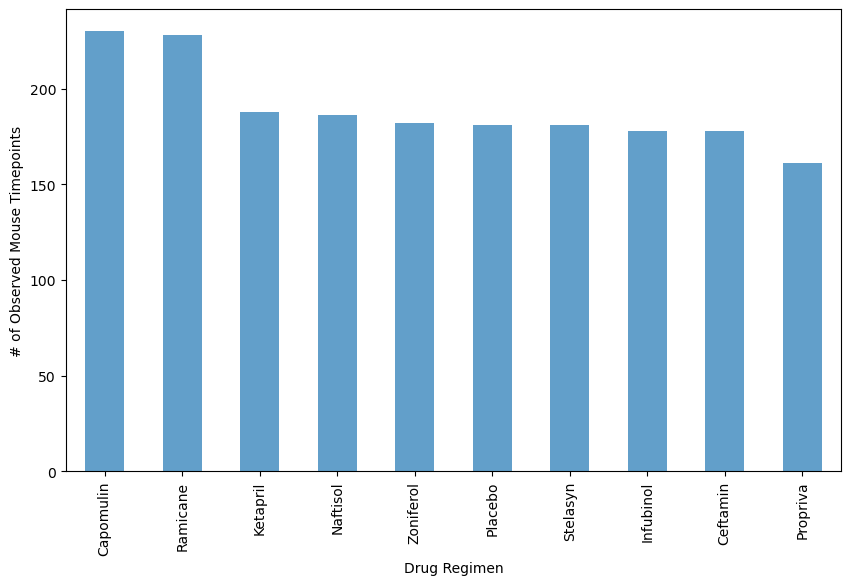

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Counting the rows for each drug
rows_per_regimen = combined_data["Drug Regimen"].value_counts()

# creating the bar graph
rows_per_regimen.plot(kind="bar", alpha=0.7, align="center", figsize=(10,6))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# verifying
plt.show()


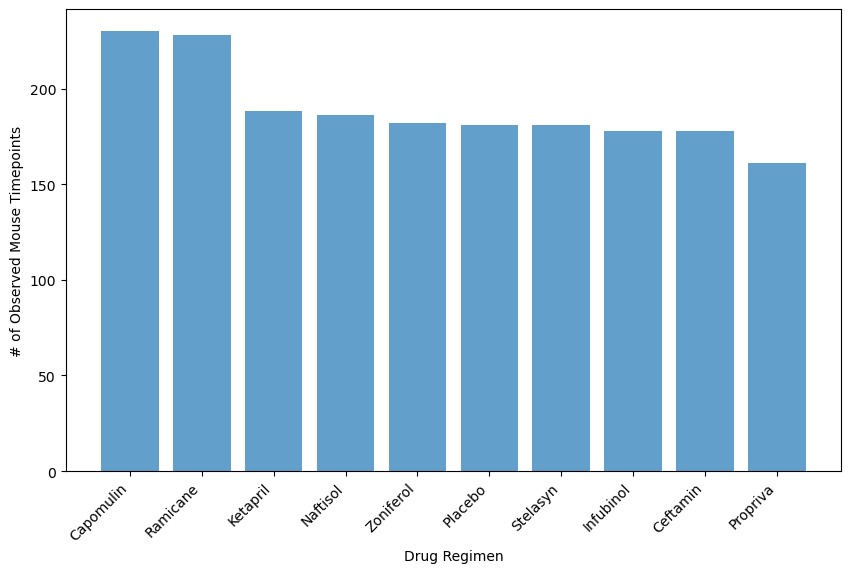

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(rows_per_regimen.index, rows_per_regimen, alpha=0.7, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# rotating for easier reading
plt.xticks(rotation=45, ha="right")

# verifying
plt.show()

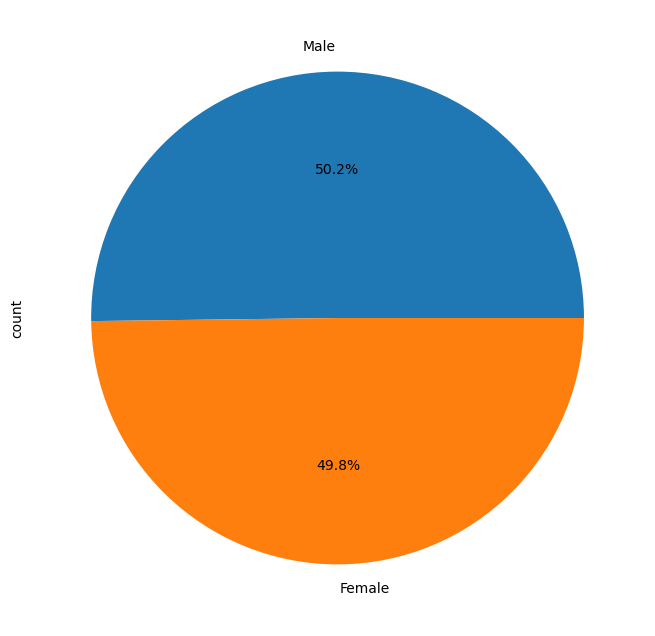

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Grabbing the total entries for the "Sex" column
#these are the percents the assignment displays
gender_distribution = clean_data["Sex"].value_counts()

# Create a pie plot using Pandas
gender_distribution.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))


# Show the plot
plt.show()

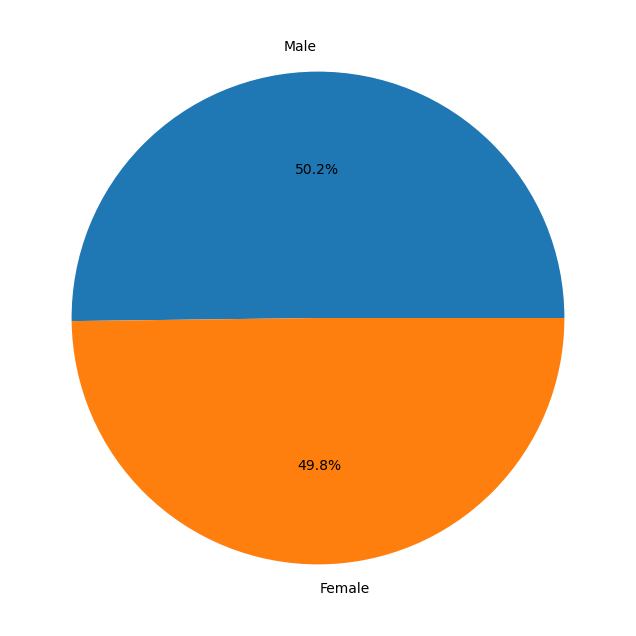

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

filtered_data = combined_data[combined_data["Drug Regimen"].isin(treatments)]


# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints_df = pd.DataFrame(last_timepoints).reset_index()
final_tumor_volume = pd.merge(last_timepoints_df, combined_data, on=["Mouse ID", "Timepoint"], how="left")

final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [45]:
# Put treatments into a list for for loop (and later for plot labels)

#already done above
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_subset = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol_subset)
    quartiles = tumor_vol_subset.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = tumor_vol_subset.loc[(tumor_vol_subset < lower_bound) | (tumor_vol_subset > upper_bound)]
    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Possible Outliers: {outliers.tolist()}")

Treatment: Capomulin
IQR: 7.781863460000004
Possible Outliers: []
Treatment: Ramicane
IQR: 9.098536719999998
Possible Outliers: []
Treatment: Infubinol
IQR: 11.477135160000003
Possible Outliers: [36.3213458]
Treatment: Ceftamin
IQR: 15.577752179999997
Possible Outliers: []


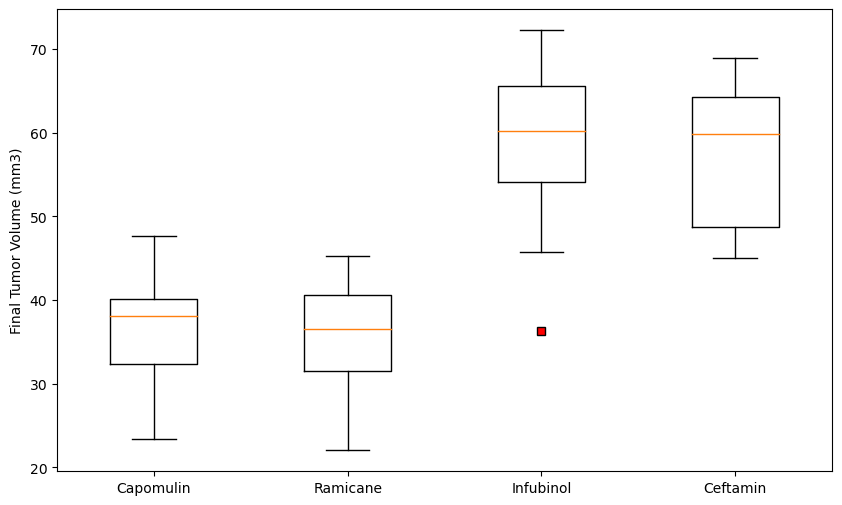

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='s'))
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

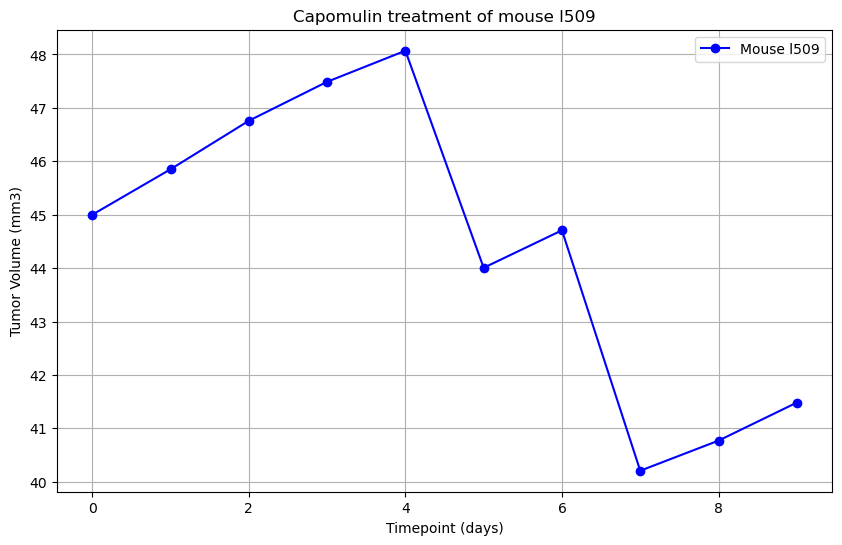

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_capomulin_data = combined_data[(combined_data["Mouse ID"] == "l509") & (combined_data["Drug Regimen"] == "Capomulin")]


timepoints = range(len(mouse_capomulin_data))

# Generate a line plot
plt.figure(figsize=(10, 6))
plt.plot(timepoints, mouse_capomulin_data["Tumor Volume (mm3)"], marker='o', color='blue', label="Mouse l509")

   
plt.title(f'Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()


plt.grid(True)
plt.show()



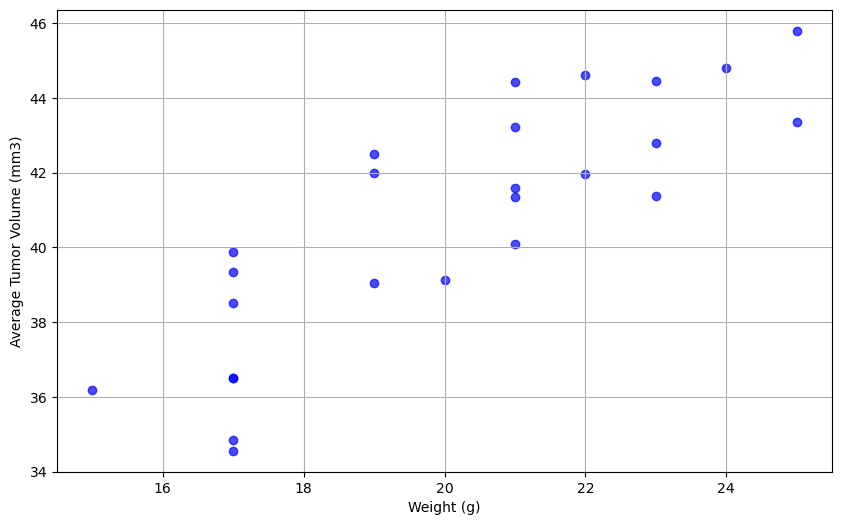

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# getting the average
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merging the two dataframes back together
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on="Mouse ID", how="left")

plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"], color='blue', alpha=0.7)


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)


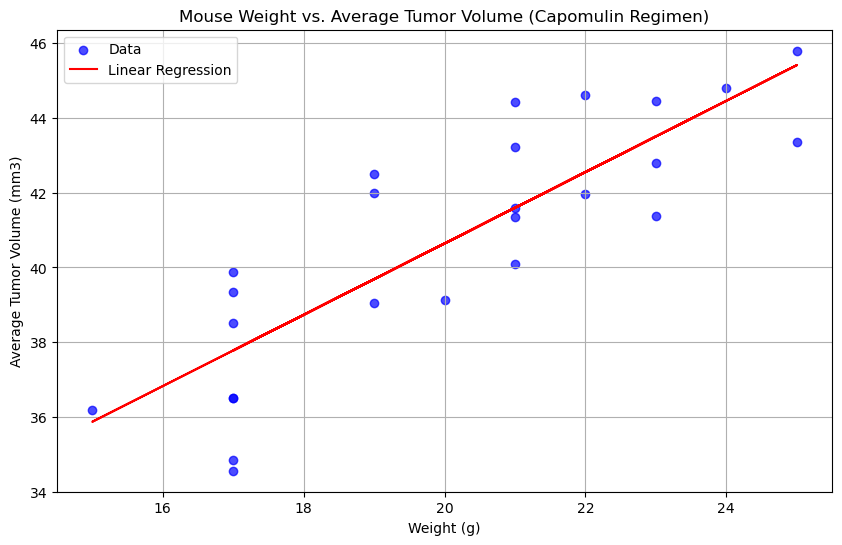

In [80]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = pearsonr(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

# Generating the plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"], color='blue', alpha=0.7, label='Data')
plt.plot(merged_data["Weight (g)"], intercept + slope * merged_data["Weight (g)"], color='red', label='Linear Regression')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

# Show the plot
plt.grid(True)
plt.show()